### Sentiment Analysis(Text classification) with Convolutional Neural Network

We will perform text classification on the Movie Review Data which is a collection of movie reviews retrieved from the imdb website. We will attempt to predict the sentiment of a movie review that is either positive or negative.

### Data Preparation
The data consists of 1000 positive and 1000 negative movie reviews. Each review is a text file and are located in separate folders for postive and negative reviews.

We will keep 900 reviews from both positive and negative reviews for training the model and remianing 100 reviews for testing the model.

In [1]:
# Libraries
from os import listdir
import string
from string import punctuation
from nltk.corpus import stopwords
from collections import Counter

#### Loading and Cleaning Reviews
- split tokens on white space
- remove all punctuations
- remove all words that are not purely comprised of alphabets
- remove the stopwords
- remove all words that are of 1 character length

In [2]:
# function for loading the files
def load_file(filename):
    #open the file as read only
    file = open(filename, 'r')
    # read all the text
    text = file.read()
    # close the file
    file.close()
    return text

In [3]:
# example of a review
review = load_file('txt_sentoken/neg/cv000_29416.txt')
print(review)

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [4]:
# function to clean the text
def clean_text(text):
    # split the text into tokens
    tokens = text.split()
    # remove punctuations
    table = str.maketrans("","", string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove tokens that not alphabetic
    tokens = [w for w in tokens if w.isalpha()]
    # filter out stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out 1 character tokens
    tokens = [w for w in tokens if len(w)> 1]
    return tokens

In [5]:
# text after cleaning
text = load_file('txt_sentoken/neg/cv000_29416.txt')
tokens = clean_text(text)
print(tokens)

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mindfuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'didnt', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'whats', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions', 'disappearances', 'looooot', 'chase', 'scen

#### Define a Vocabulary

To reduce the computaional effort we will create a vocabulary of words that would be more predictive of determining the sentiment of the movie reviews. We will only keep the words that appears atleaset in certain number of times in all reviews.
We will apply counter to map the words to their count.

In [6]:
# function to create vocabulary from all the reviews
def add_reviews_to_vocab(filename, vocab):
    # load review
    review = load_file(filename)
    # clean the review
    tokens = clean_text(review)
    # udate the couts
    vocab.update(tokens)
    
# function to process all the reviews
def process_reviews(directory, vocab, is_train=True):
    # go through all the files in the folder
    for filename in listdir(directory):
        # skip any reviews from test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the path of the file
        path = directory + '/' + filename
        # add reviews to vocab
        add_reviews_to_vocab(path, vocab)
    

In [7]:
# initiate a vocab counter
vocab = Counter()

# add all words from reviews to the vocab
#negative reviews
process_reviews(directory = 'txt_sentoken/neg', vocab = vocab, is_train = True)
#positive reviews
process_reviews(directory = 'txt_sentoken/pos', vocab = vocab, is_train = True)

In [8]:
# length of the vocab
print(f'The length of the vocab is: {len(vocab)}')
print()

# most common 50 words
print('Most common 50 words in the vocab:')
print(vocab.most_common(50))

The length of the vocab is: 44276

Most common 50 words in the vocab:
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('bad', 1248), ('could', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


As mentioned earlier, we will now filter out the words by setting the minimum occurence of the word in all reviews to 2, that is we will only keep the words that appear atleast 2 times in all the reviews.

In [9]:
# keep words with a miniumum occurence
minimum_occurence = 2
tokens = [w for w,c in vocab.items() if c>=minimum_occurence]

print(f'The reduced size of the vocab is: {len(tokens)}')

The reduced size of the vocab is: 25767


After getting the reduced vocabulary of the words we can save it for the later use in the modeling. We will save it as file with one word per line.

In [10]:
# save the vocab
def save_vocab(tokens, filename):
    # convert the tokens to a single text arranged in one line per word
    data = '\n'.join(tokens)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close the file
    file.close()
    
# save the vocabulary
save_vocab(tokens = tokens, filename = 'vocab.txt')

### Data Prepration for the Modeling (Word Embedding)

In [11]:
# load the vocabulary created
with open('vocab.txt', 'r') as f:
    vocab =  f.read()

vocab = vocab.split()
vocab = set(vocab)

For Modeling purpose we would want the reviews to be a single string for easy encoding later as sequence of integers. So we will update our clean_text function accordingly, where we will alos add an additional step to keep only words from the vocabulary we created.

In [12]:
# update clean_text function
def clean_text(text, vocab):
    # split the text into tokens
    tokens = text.split()
    # remove punctuations
    table = str.maketrans("","", string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # filter out tokens not in the vocab
    tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens

Similarly, we will alos update the process_reviews function and here will will store the reviews as a list .

In [13]:
# update function to process all the reviews
def process_reviews(directory, vocab, is_train=True):
    reviews_list = list()
    # go through all the files in the folder
    for filename in listdir(directory):
        # skip any reviews from test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the path of the file
        path = directory + '/' + filename
        # load the review
        review = load_file(path)
        # clean the review
        tokens = clean_text(review, vocab)
        # add to the list
        reviews_list.append(tokens)
    return reviews_list

In [14]:
# load all the training reviews
positive_reviews = process_reviews(directory = 'txt_sentoken/pos',vocab = vocab, is_train = True)
negative_reviews = process_reviews(directory = 'txt_sentoken/neg',vocab = vocab, is_train = True)
train_reviews = positive_reviews + negative_reviews

In [15]:
train_reviews[0:2]

['films adapted comic books plenty success whether theyre superheroes batman superman spawn geared toward kids casper arthouse crowd ghost world theres never really comic book like hell starters created alan moore eddie campbell brought medium whole new level mid series called say moore campbell thoroughly subject jack ripper would like saying michael jackson starting look little odd book graphic novel pages long includes nearly consist nothing footnotes words dont dismiss film source get past whole comic book thing might find another stumbling block hells directors albert allen hughes getting hughes brothers direct seems almost ludicrous casting carrot top well anything better direct film thats set ghetto features really violent street crime mad geniuses behind menace ii society ghetto question course whitechapel londons east end filthy place whores called unfortunates starting get little nervous mysterious psychopath carving profession surgical precision first stiff turns copper pete

#### Encoding the text as a sequence of integers

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on train reviews
tokenizer.fit_on_texts(train_reviews)

In [17]:
# integers assigned for each word
tokenizer.index_word

{1: 'film',
 2: 'one',
 3: 'movie',
 4: 'like',
 5: 'even',
 6: 'good',
 7: 'time',
 8: 'story',
 9: 'films',
 10: 'would',
 11: 'much',
 12: 'also',
 13: 'characters',
 14: 'get',
 15: 'character',
 16: 'two',
 17: 'first',
 18: 'see',
 19: 'way',
 20: 'well',
 21: 'make',
 22: 'really',
 23: 'little',
 24: 'life',
 25: 'plot',
 26: 'people',
 27: 'could',
 28: 'bad',
 29: 'scene',
 30: 'movies',
 31: 'never',
 32: 'best',
 33: 'new',
 34: 'scenes',
 35: 'man',
 36: 'many',
 37: 'doesnt',
 38: 'know',
 39: 'dont',
 40: 'hes',
 41: 'great',
 42: 'another',
 43: 'action',
 44: 'love',
 45: 'us',
 46: 'go',
 47: 'director',
 48: 'end',
 49: 'something',
 50: 'still',
 51: 'seems',
 52: 'back',
 53: 'made',
 54: 'theres',
 55: 'work',
 56: 'makes',
 57: 'however',
 58: 'years',
 59: 'world',
 60: 'every',
 61: 'big',
 62: 'though',
 63: 'better',
 64: 'enough',
 65: 'take',
 66: 'seen',
 67: 'around',
 68: 'performance',
 69: 'real',
 70: 'role',
 71: 'going',
 72: 'audience',
 73: 'gets'

Now, the words have been mapped to its integers values, we can now use it to encode the reviews in the training data.

In [18]:
# encoing the reviews
encoded_train_reviews = tokenizer.texts_to_sequences(train_reviews)

In [19]:
print(encoded_train_reviews[0])

[9, 2683, 248, 1492, 899, 536, 509, 211, 7005, 564, 4564, 1454, 7006, 1207, 290, 5402, 11016, 1611, 1612, 59, 54, 31, 22, 248, 302, 4, 394, 11017, 717, 1234, 1587, 776, 1297, 762, 3475, 176, 33, 443, 6618, 156, 272, 88, 1587, 1297, 1696, 738, 386, 12257, 10, 4, 714, 224, 1092, 2068, 79, 23, 1133, 302, 1391, 398, 5670, 97, 1119, 317, 9143, 87, 19605, 527, 39, 7007, 1, 1922, 14, 289, 176, 248, 302, 86, 119, 94, 42, 6268, 2684, 11018, 708, 2957, 1018, 2484, 222, 2484, 497, 1736, 51, 83, 2806, 1053, 7910, 370, 20, 129, 63, 1736, 1, 91, 161, 4251, 528, 22, 900, 883, 586, 1493, 7008, 277, 1640, 892, 850, 4251, 372, 118, 19606, 13894, 3029, 48, 12258, 125, 19607, 272, 19608, 2068, 14, 23, 2883, 973, 6269, 13895, 3381, 19609, 7423, 17, 4565, 234, 12259, 406, 3476, 12260, 59, 64, 1235, 3112, 12261, 19610, 1536, 2485, 2221, 2958, 208, 19610, 11019, 12262, 914, 8492, 263, 19611, 11020, 3382, 19612, 19613, 325, 5958, 19606, 3795, 2000, 273, 862, 1298, 4401, 2486, 88, 74, 3796, 2222, 2541, 4252, 34

#### Padding Sequences

We need to make sure that all the reviews have equal length, for that we will use padding to make all the reviews to the same length.

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# max length of a review
max_length = max([len(r.split()) for r in train_reviews])
print(f'The maximum length of all reviews is: {max_length} words')

The maximum length of all reviews is: 1317 words


In [21]:
# padding the training reviews
X_train = pad_sequences(encoded_train_reviews, maxlen=max_length, padding = 'post')

In [22]:
# defining the training labels
from numpy import array
y_train = array([0 for i in range(900)] + [1 for i in range(900)])

#### Preparing the test data

In [23]:
# load the test reviews
positive_reviews = process_reviews('txt_sentoken/pos', vocab, is_train = False)
negative_reviews = process_reviews('txt_sentoken/neg', vocab, is_train = False)
test_reviews = positive_reviews + negative_reviews

In [24]:
# sequence encoding
encoded_test_reviews = tokenizer.texts_to_sequences(test_reviews)

# padding
X_test = pad_sequences(encoded_test_reviews, maxlen = max_length, padding = 'post')

In [25]:
# defining the test labels
y_test = array([0 for i in range(100)] + [1 for i in range(100)])

#### Defining the size of vocabulary for word embeddings

For embedding layer in our model we need to specify the vocabulary size, which we will set as the total number of unique words in our reviews and add 1 for any unknown words. Also, with the word embeddings we will reduce the vector space to 100 dimensions.

In [26]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1

### Modeling

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Embedding,MaxPooling1D, Flatten, Dense, Dropout

In [31]:
# Define the model architecture
model = Sequential()
# embedding layer
model.add(Embedding(input_dim = vocab_size, output_dim = 100, input_length=max_length))

# 1st convolutional layer
model.add(Conv1D(filters = 32, kernel_size = 8, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))

# 2nd convolutional layer
#model.add(Conv1D(filters = 64, kernel_size = 8, activation = 'relu'))
#model.add(MaxPooling1D(pool_size = 2))
#model.add(Dropout(0.4))

model.add(Flatten())

# connecting layer
model.add(Dense(units = 20, activation = 'relu'))

# output layer
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1317, 100)         2576800   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1310, 32)          25632     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 655, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20960)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                419220    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 3,021,673
Trainable params: 3,021,673
Non-trainable params: 0
____________________________________________

In [32]:
# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# fit the model
model.fit(X_train, y_train, epochs = 10, batch_size =10, validation_split=0.2, verbose = 1)

Train on 1440 samples, validate on 360 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1440/1440 [==============================] - 28s 20ms/sample - loss: 0.6391 - accuracy: 0.6257 - val_loss: 1.1482 - val_accuracy: 0.0000e+00
Epoch 2/10
1440/1440 [==============================] - 27s 18ms/sample - loss: 0.2791 - accuracy: 0.8646 - val_loss: 1.0880 - val_accuracy: 0.5861
Epoch 3/10
1440/1440 [==============================] - 27s 19ms/sample - loss: 0.0191 - accuracy: 0.9965 - val_loss: 0.9783 - val_accuracy: 0.6944
Epoch 4/10
1440/1440 [==============================] - 27s 19ms/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.0687 - val_accuracy: 0.7028
Epoch 5/10
1440/1440 [==============================] - 27s 19ms/sample - loss: 5.7212e-04 - accuracy: 1.0000 - val_loss: 1.1035 - val_accuracy: 0.7139
Epoch 6/10
1440/1440 [==============================] - 27s 19ms/sample - loss: 4.0397e-04 - accuracy: 1.0000 -

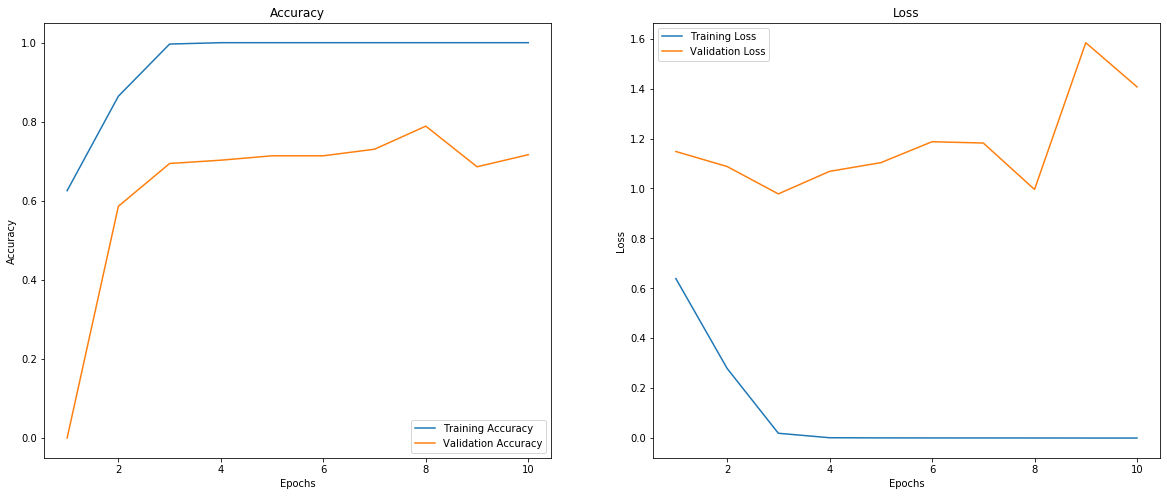

In [35]:
import matplotlib.pyplot as plt

epochs = range(1,11)
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(epochs, model.history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs, model.history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model.history.history['loss'], label = 'Training Loss')
plt.plot(epochs, model.history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see our model is overfitting, we can try adding Dropout layer to reduce the overfitting.

In [36]:
model = Sequential()
# embedding layer
model.add(Embedding(input_dim = vocab_size, output_dim = 100, input_length=max_length))

# 1st convolutional layer
model.add(Conv1D(filters = 32, kernel_size = 8, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.4))

model.add(Flatten())

# connecting layer
model.add(Dense(units = 20, activation = 'relu'))

# output layer
model.add(Dense(units = 1, activation = 'sigmoid'))


In [37]:
# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs = 10, batch_size = 10, validation_split=0.2, verbose = 1)

Train on 1440 samples, validate on 360 samples
Epoch 1/10
1440/1440 [==============================] - 29s 20ms/sample - loss: 0.6478 - accuracy: 0.6257 - val_loss: 1.1244 - val_accuracy: 0.0000e+00
Epoch 2/10
1440/1440 [==============================] - 27s 19ms/sample - loss: 0.3081 - accuracy: 0.8465 - val_loss: 1.0325 - val_accuracy: 0.5417
Epoch 3/10
1440/1440 [==============================] - 28s 20ms/sample - loss: 0.0248 - accuracy: 0.9958 - val_loss: 1.9934 - val_accuracy: 0.4250
Epoch 4/10
1440/1440 [==============================] - 28s 19ms/sample - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.1972 - val_accuracy: 0.6500
Epoch 5/10
1440/1440 [==============================] - 28s 19ms/sample - loss: 6.8115e-04 - accuracy: 1.0000 - val_loss: 1.0603 - val_accuracy: 0.7028
Epoch 6/10
1440/1440 [==============================] - 28s 19ms/sample - loss: 3.6374e-04 - accuracy: 1.0000 - val_loss: 1.0960 - val_accuracy: 0.7056
Epoch 7/10
1440/1440 [==============================]

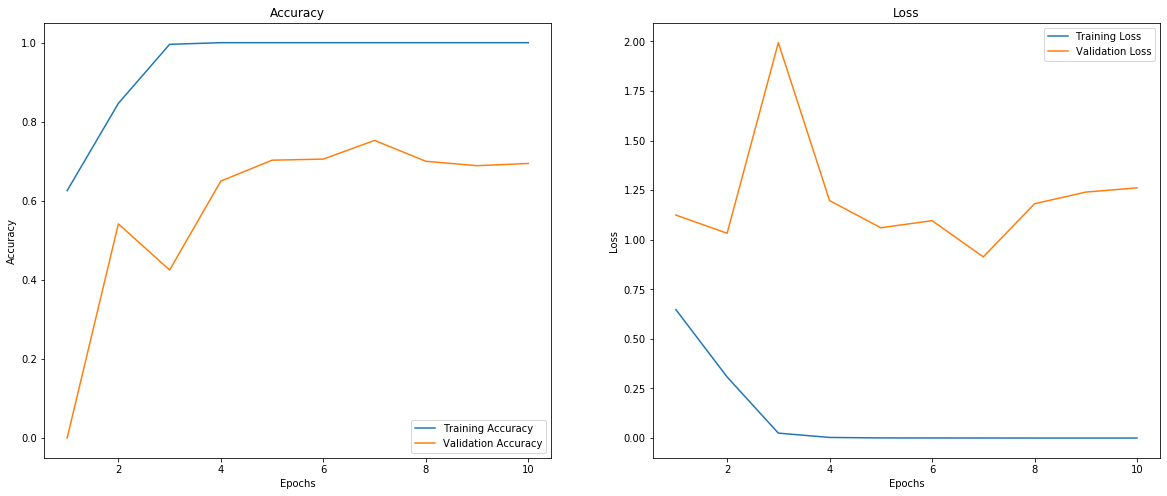

In [38]:
epochs = range(1,11)
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(epochs, model.history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs, model.history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model.history.history['loss'], label = 'Training Loss')
plt.plot(epochs, model.history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

With the dropout layer we are able to reduce the overfitting to certen level.

In [39]:
# Evaluation on test set
loss, accuracy = model.evaluate(X_test, y_test,verbose = 2)
print()
print(f'Test Accuracy: {round(accuracy*100,2)} %')

200/1 - 1s - loss: 0.4491 - accuracy: 0.8300

Test Accuracy: 83.0 %
